In [4]:
# Import Modules
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [5]:
# Load the Data
raw_Data= pd.read_excel('BMED_data.xlsx')

# Data Grouping
group_checker = list(raw_Data[['T','V','E','Ci']].iloc[0])
group_index = []
for i in range(len(raw_Data)):
    if not group_checker == list(raw_Data[['T','V','E','Ci']].iloc[i]):
        group_index.append(i)
        group_checker = list(raw_Data[['T','V','E','Ci']].iloc[i])

# MB data
MB_Data = raw_Data[['T','V','E','Ci','t','CF','CA']]

# Set the training data
X = MB_Data[['T','V','E','Ci','t']].values
Y = MB_Data[['CF']].values

# transform the pytorch tensor
Xt = torch.FloatTensor(X)
Yt = torch.FloatTensor(Y)

In [2]:
class CustomModel_CF(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,40),
            nn.ReLU(),
            nn.Linear(40,20),
            nn.ReLU(),
            nn.Linear(20,10),
            nn.ReLU(),
            nn.Linear(10,5),
        )

    def forward(self, x):
        t = x[:,4].unsqueeze(1)
        C0 = x[:,3].unsqueeze(1)
        a0, a1, a2, a3, a4 = self.hidden(x).chunk(5, dim=1)

        k = 1e-7*(a0 + a1*t + a2*(t**2) + a3*(t**3) + a4*(t**4))


        return C0*torch.exp(-k*t)

In [7]:
model_CF = CustomModel_CF()
model_CF.load_state_dict(torch.load('model_CF.pth'))

<All keys matched successfully>

In [10]:
ypred = model_CF(Xt)
Y = MB_Data[['CF']].values
ypred = ypred.detach().numpy()


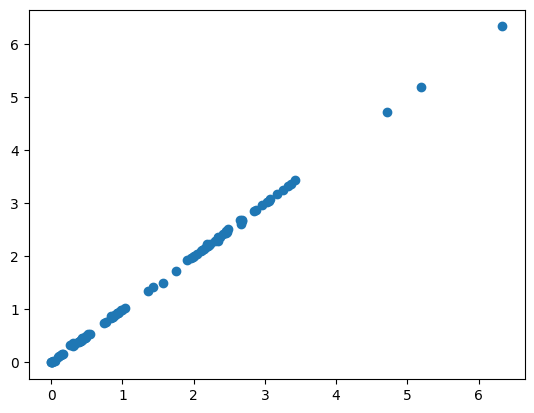

In [11]:
plt.scatter(Y,ypred)